In [1]:
import numpy as np
import keras_ocr
import sys # to access the system
import cv2

pipeline = keras_ocr.pipeline.Pipeline()

def detect_w_keras(pipeline,image_path):
    """Function returns detected text from image"""

    read_image = keras_ocr.tools.read(image_path)

    prediction_groups = pipeline.recognize([read_image])
    return prediction_groups

Looking for C:\Users\pskir\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\pskir\.keras-ocr\crnn_kurapan.h5


In [27]:
image_path = "test.jpg"
pred = detect_w_keras(pipeline,image_path)

1/1 [==============================] - 2s 2s/step


In [28]:
pred = pred[0]

In [29]:
box_group = np.array([x[1] for x in pred])

In [30]:
box_group

array([[[ 83.40399 , 412.11984 ],
        [146.73364 , 410.00888 ],
        [147.4939  , 432.81686 ],
        [ 84.164246, 434.92783 ]],

       [[499.      , 411.      ],
        [565.      , 411.      ],
        [565.      , 431.      ],
        [499.      , 431.      ]],

       [[154.      , 412.      ],
        [279.      , 412.      ],
        [279.      , 435.      ],
        [154.      , 435.      ]],

       [[288.      , 412.      ],
        [375.      , 412.      ],
        [375.      , 432.      ],
        [288.      , 432.      ]],

       [[383.62842 , 412.38983 ],
        [439.88226 , 411.05048 ],
        [440.35535 , 430.92017 ],
        [384.1015  , 432.25952 ]],

       [[450.4521  , 413.20547 ],
        [492.8014  , 411.637   ],
        [493.4781  , 429.90823 ],
        [451.12878 , 431.4767  ]],

       [[275.      , 442.      ],
        [420.      , 442.      ],
        [420.      , 465.      ],
        [275.      , 465.      ]],

       [[429.36804 , 445.1487  ],


In [31]:
def isOnSameLine(boxOne, boxTwo):
    boxOneStartY = boxOne[0,1]
    boxOneEndY = boxOne[2,1]
    boxTwoStartY = boxTwo[0,1]
    boxTwoEndY = boxTwo[2,1]
    if((boxTwoStartY <= boxOneEndY and boxTwoStartY >= boxOneStartY)
    or(boxTwoEndY <= boxOneEndY and boxTwoEndY >= boxOneStartY)
    or(boxTwoEndY >= boxOneEndY and boxTwoStartY <= boxOneStartY)):
        return True
    else:
        return False

def segmentLines(box_group):
    import numpy as np

    box_group = box_group[np.argsort(box_group[:, 0, 1])]

    lined_box_group = np.zeros(box_group.shape)
    sorted_box_group = np.zeros(box_group.shape)

    temp = []
    i = 0
    lines_list = []

    if len(box_group) > 1:
        while i < len(box_group):
            for j in range(i + 1, len(box_group)):
                if(isOnSameLine(box_group[i],box_group[j])):

                    if i not in temp:
                        temp.append(i)
                    if j not in temp:
                        temp.append(j)

            if len(temp) == 0:
                temp.append(i)

            lined_box_group = box_group[np.array(temp)]
            t = np.argsort(lined_box_group[:, 0, 0])
            lines_list.append([x+i for x in t])
            lined_box_group = lined_box_group[t]
            sorted_box_group[i:temp[-1]+1] = lined_box_group
            i = temp[-1] + 1

            temp = []
    else:
        sorted_box_group = box_group
  
    return sorted_box_group,lines_list

In [32]:
s,l = segmentLines(box_group)
# print(l)

In [33]:
for i in range(len(l)):
    l[i].sort()

# print(l)

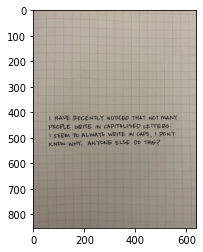

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

In [35]:
for ran in l:
    s_sub = s[ran[0]:ran[-1]+1]
    #print(s_sub)
    
    for x in s_sub:
        
        for text,box in pred:

            if int(x[0][0]) == int(box[0][0]) and int(x[0][1]) == int(box[0][1]):
                print(text,end=" ")
                break

have fecentli noticed that ndt mant people wiite in capitalsed leiters l seem to alwats wiite in caps d l dont kndw wht antone else dd this7 